### Accessing Data with API's

**OBJECTIVES**

- More with `groupby` and `.agg`
- Data Access via API


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Input via APIs

This is about using an api "Application program interface" ...basic idea, allows
direct access to some database or parts of it without having do download everything



In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime 

### Accessing Data Without a Library

![](images/fred_api.png)



To start, we will use the federal reserve of St. Louis API as a running example.  Head over [here](https://fred.stlouisfed.org/docs/api/fred/) to view the documentation.

### Exploring the data releases

As a first example, we will make a request of the api and try to structure the response as a DataFrame.  

![](images/request_response.png)



In [261]:
import requests

In [262]:
api_key = 'aec8814bc2a87a3f6caaf615d0529cf0'

In [263]:
#url from api docs
url = f'https://api.stlouisfed.org/fred/releases?api_key={api_key}&file_type=json'

In [264]:
#make a request
response = requests.get(url)

In [265]:
#examine response code
response

<Response [200]>

In [266]:
#text of the response
response.text[:1000]

'{"realtime_start":"2025-09-29","realtime_end":"2025-09-29","order_by":"release_id","sort_order":"asc","count":319,"offset":0,"limit":1000,"releases":[{"id":9,"realtime_start":"2025-09-29","realtime_end":"2025-09-29","name":"Advance Monthly Sales for Retail and Food Services","press_release":true,"link":"http:\\/\\/www.census.gov\\/retail\\/","notes":"The U.S. Census Bureau conducts the Advance Monthly Retail Trade and Food Services Survey to provide an early estimate of monthly sales by kind of business for retail and food service firms located in the United States. Each month, questionnaires are mailed to a probability sample of approximately 4,700 employer firms selected from the larger Monthly Retail Trade Survey. Advance sales estimates are computed using a link relative estimator. For each detailed industry, we compute a ratio of current-to previous month weighted sales using data from units for which we have obtained usable responses for both the current and previous month. For 

In [267]:
#turn into json
data = response.json()

In [268]:
#DataFrame of response
pd.DataFrame(data['releases']).head()

,id,realtime_start,realtime_end,name,press_release,link,notes
0,9,2025-09-29,2025-09-29,Advance Monthly Sales for Retail and Food Serv...,True,http://www.census.gov/retail/,The U.S. Census Bureau conducts the Advance Mo...
1,10,2025-09-29,2025-09-29,Consumer Price Index,True,http://www.bls.gov/cpi/,NaN
2,11,2025-09-29,2025-09-29,Employment Cost Index,True,http://www.bls.gov/ncs/ect,NaN
3,13,2025-09-29,2025-09-29,G.17 Industrial Production and Capacity Utiliz...,True,http://www.federalreserve.gov/releases/g17/,"For questions on the data, please contact the ..."
4,14,2025-09-29,2025-09-29,G.19 Consumer Credit,True,http://www.federalreserve.gov/releases/g19/,"For questions on the data, please contact the ..."


### Finding Series

From the search documentation [here](https://fred.stlouisfed.org/docs/api/fred/series_search.html).

In [297]:
url = f'https://api.stlouisfed.org/fred/series/search?search_text=consumer+price+index&api_key={api_key}&file_type=json'

In [298]:
#make request turn into json
r = requests.get(url)
data = r.json()

In [300]:
#explore the keys of response


In [ ]:
#dataframe of seriess


### Exploring the Unemployment Rate

The unemployment rate is `series_id: 'UNRATE'`.  We explore the data below.

In [235]:
url = 'https://api.stlouisfed.org/fred/series/observations'

In [236]:
#structure url and make request
params = {'series_id':'UNRATE',
          'api_key': api_key,
         'file_type': 'json'}
r = requests.get(url, params = params)

In [237]:
#response code


<Response [200]>

In [301]:
#explore the text


'{"realtime_start":"2025-09-29","realtime_end":"2025-09-29","order_by":"search_rank","sort_order":"desc","count":30392,"offset":0,"limit":1000,"seriess":[{"id":"CPIAUCSL","realtime_start":"2025-09-29",'

In [238]:
#turn into json


In [302]:
#observations are what we want


In [306]:
#dataframe of observations
obs_df = ''

In [304]:
#look over .info


In [244]:
#change value to float


In [246]:
#change date to datetime


In [305]:
#set date to index


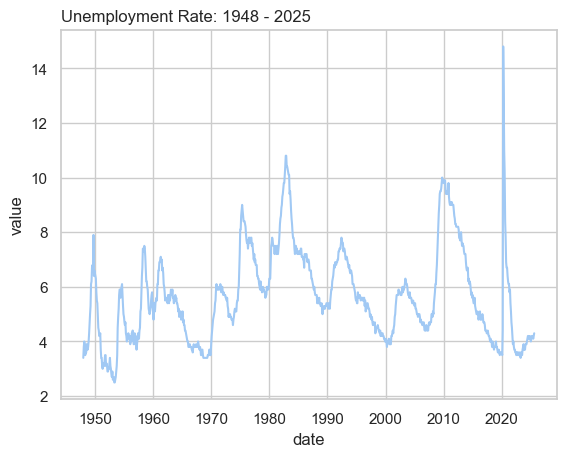

In [249]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.lineplot(data = obs_df,x = obs_df.index,  y = 'value')
plt.title('Unemployment Rate: 1948 - 2025', loc = 'left');

In [250]:
!pip install fredpy

  Using cached fredpy-3.2.10-py3-none-any.whl.metadata (442 bytes)
Using cached fredpy-3.2.10-py3-none-any.whl (11 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


**PROBLEM**

Find another series from the FRED data and create a plot of your response.

### Accessing Data with a Library

The SEC shares much of its data through an API called EDGAR.  There is a library `pyedgar` that allows you to interact with the API [here](https://github.com/joeyism/py-edgar).  Can you use the library to extract filings for a company of your choosing?

In [307]:
!pip install edgar

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [315]:
from edgar import Company, TXTML

company = Company("INTERNATIONAL BUSINESS MACHINES CORP", "0000051143")
doc = company.get_10K()
text = TXTML.parse_full_10K(doc)

In [318]:
print(text[:1000])

 version='1.0' encoding='ASCII'? XBRL Document Created with the Workiva Platform Copyright 2025 Workiva r:e5e4c6dd-a0e3-4a8d-aa78-eb8c6666d274,g:21436d97-1a01-444f-9a49-04dee52d2242,d:af7e987c179946fe9556e9c6006b4d87 ibm-20241231 CHX 0000051143 2024 FY false P5Y P3Y http://fasb.org/us-gaap/2024#Revenues http://fasb.org/us-gaap/2024#Revenues http://fasb.org/us-gaap/2024#Revenues P1Y P1Y http://fasb.org/us-gaap/2024#SellingGeneralAndAdministrativeExpense http://fasb.org/us-gaap/2024#SellingGeneralAndAdministrativeExpense http://fasb.org/us-gaap/2024#SellingGeneralAndAdministrativeExpense P1Y P1Y http://fasb.org/us-gaap/2024#AccountsPayableCurrent http://fasb.org/us-gaap/2024#AccountsPayableCurrent http://fasb.org/us-gaap/2024#PropertyPlantAndEquipmentAndFinanceLeaseRightOfUseAssetAfterAccumulatedDepreciationAndAmortization http://fasb.org/us-gaap/2024#PropertyPlantAndEquipmentAndFinanceLeaseRightOfUseAssetAfterAccumulatedDepreciationAndAmortization http://fasb.org/us-gaap/2024#ShortTermB

### Last FM

The API for Last FM requires an API Key.  Head over [here](https://www.last.fm/api/authentication) to signup for yours -- it should be instantaneous.

In [ ]:
base_url = ''


In [ ]:
#examine the response


In [ ]:
#extract the headline


**Exercise**

Use the `album.GetInfo` method [docs](https://www.last.fm/api/show/album.getInfo) to get information about an album of your choosing. 

### Finding an API

There are many different API's with interesting data out there.  Your goal is to find an API of interest and make a request of the API, structuring the result as a DataFrame.  Record your findings [here](https://forms.gle/WREHMC5xc5VnQhMn9).  